In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sbn

import pandas as pd
from house_prices import to_list_obj, to_list_miss

from mlxtend.feature_selection import ColumnSelector
from sklearn.preprocessing import OneHotEncoder, \
                                  StandardScaler
from sklearn.feature_selection import RFECV

from sklearn.pipeline import FeatureUnion, \
                             Pipeline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.manifold import TSNE

In [2]:
file = 'final_x_train.csv'

In [3]:
data = pd.read_csv(file)

In [4]:
features = list(data.columns)
feat_obj, _ = to_list_obj(data)
feat_num    = list(set(features) - set(feat_obj))  
feat_num.remove('SalePrice')

In [5]:
def model_build(categorical_columns, 
                numerical_columns, 
                estimator = LinearRegression()):
    
    encoder = FeatureUnion([
        ('categorical',Pipeline([
            ('select_columns', ColumnSelector(categorical_columns)),
            ('categorical_encoder', OneHotEncoder(handle_unknown = 'ignore'))
        ])),
        ('numerical',Pipeline([
            ('select_columns',ColumnSelector(numerical_columns)),
            ('numerical_encoder', StandardScaler())
        ]))
    ])
    
    feature_eleminate = RFECV(estimator, 
                              cv=5, 
                              step = 2, 
                              min_features_to_select = 20)
    
    model = Pipeline([
        ('encoder', encoder),
        ('feature_eleminate', feature_eleminate),
        ('estimator', estimator)
    ])
    
    return model

In [6]:
model = model_build(feat_obj,feat_num)

In [7]:
x = data.drop('SalePrice', axis = 1)
y = data['SalePrice']

In [8]:
x_train, x_test, y_train, y_test = \
                train_test_split(x,y,
                                 test_size = 0.15,
                                 random_state = 26
                                )

In [9]:
model.fit(x_train, y_train);

y_predic = model.predict(x_test)

In [20]:
scr = model.score(x_test,y_test)
print('Mode R2 Scroe {:.3f}'.format(scr))

Mode R2 Scroe 0.096


Angular coeficient = 0.92


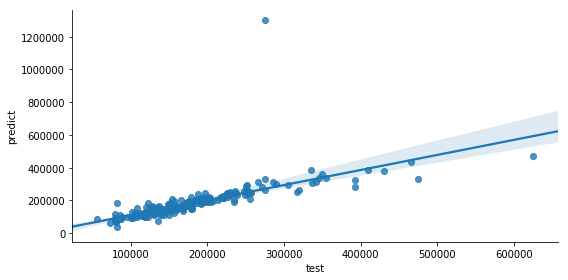

In [22]:
l_fit_coef = np.polyfit(y_test, y_predic, 1);
print('Angular coeficient = {:.2f}'.format(l_fit_coef[0]))

data = pd.DataFrame({'test':y_test, 'predict':y_predic})
axes = sbn.lmplot( x = 'test', y = 'predict', data = data, height = 4, aspect = 2)

In [12]:
delta = (y_predic - y_test).abs().apply(np.log10).values
base = model.named_steps['encoder'].transform(x_test)
base = model.named_steps['feature_eleminate'].transform(base).toarray()

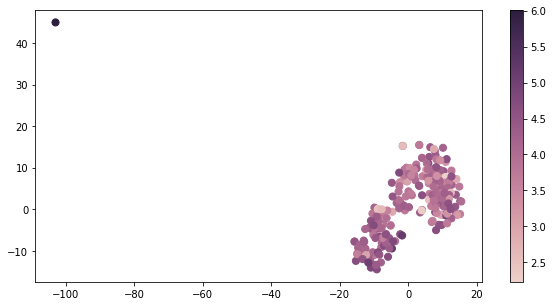

In [13]:
tsne = TSNE()

embedding = tsne.fit_transform(base)

cmap = sbn.cubehelix_palette(as_cmap=True)

f, ax = plt.subplots(figsize = (10,5))
points = ax.scatter(embedding[:,0], embedding[:,1], c=delta, s=50, cmap=cmap)
f.colorbar(points)

In [14]:
radious = embedding[:,0]**2+embedding[:,1]**2

In [15]:
ind = np.where(radious==radious.max())[0][0]
print('Predicted value {:.1f}'.format(y_predic[ind]))

Predicted value 1299596.3


In [16]:
x_test_clear = x_test.drop(y_test.index[ind],axis = 0)
y_test_clear = y_test.drop(y_test.index[ind],axis = 0)
y_pred_clear = model.predict(x_test_clear)

In [17]:
scr = model.score(x_test_clear,y_test_clear)
print('Mode R2 Scroe {:.3f}'.format(scr))

Mode R2 Scroe 0.876


Angular coeficient = 0.85


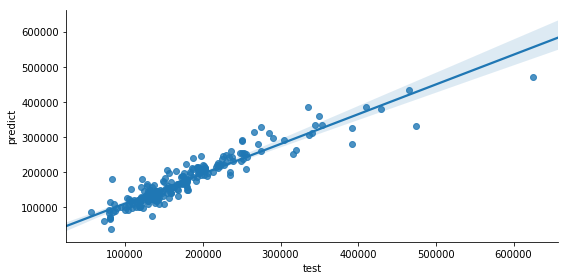

In [21]:
l_fit_coef = np.polyfit(y_test_clear, y_pred_clear, 1);
print('Angular coeficient = {:.2f}'.format(l_fit_coef[0]))

data = pd.DataFrame({'test':y_test_clear, 'predict':y_pred_clear})
axes = sbn.lmplot( x = 'test', y = 'predict', data = data, height = 4, aspect = 2)
